# Sun path diagram

Text(1.3, -0.6, 'North')

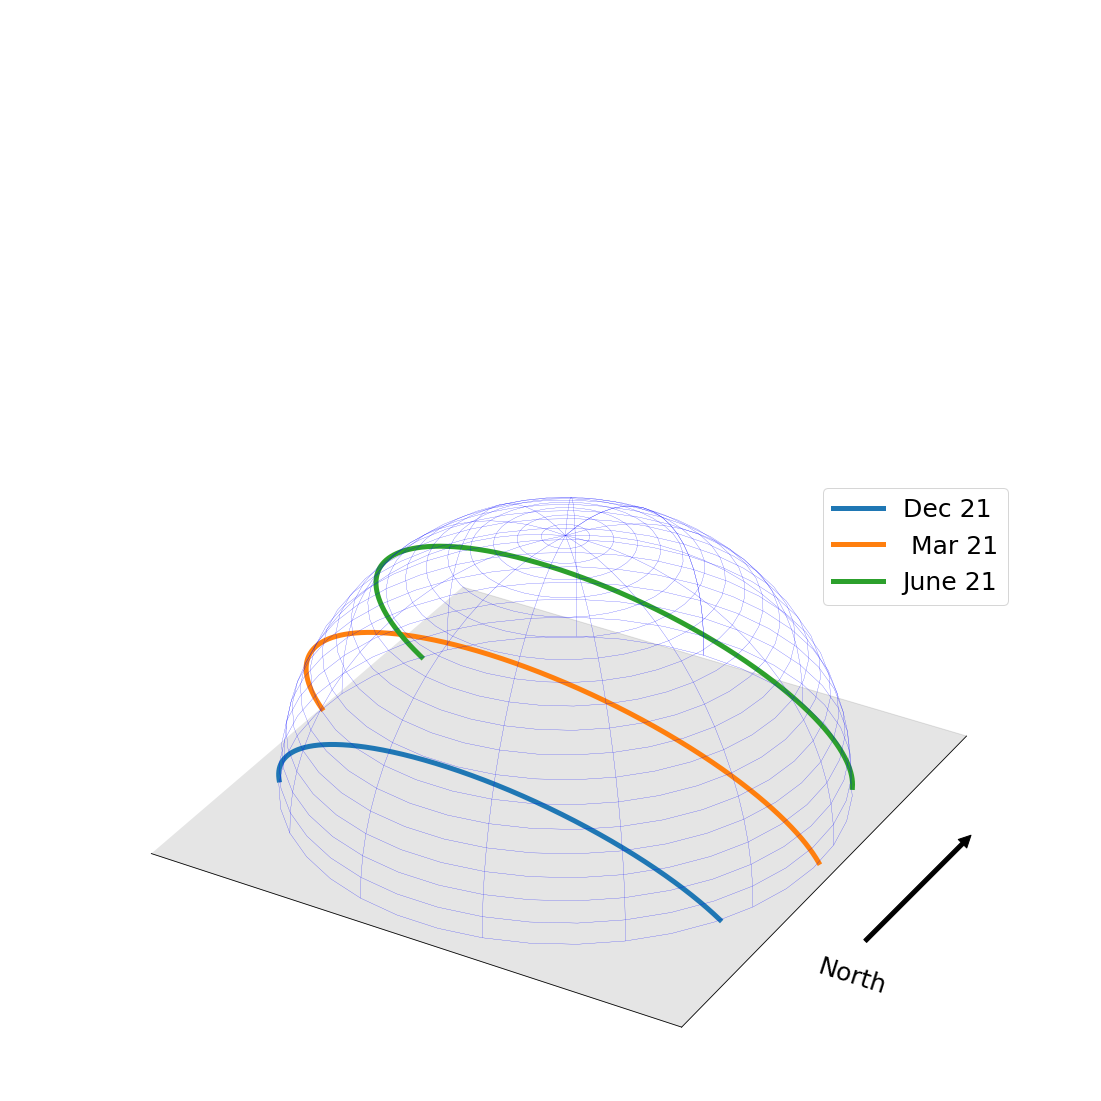

In [5]:
import math
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from scipy.interpolate import spline

n = range(1,366)
deltas = [math.asin(-math.sin(math.radians(23.45)) * math.cos(math.radians(360*(item +10)/365.25))) for item in n]  # Solar declination, a function of day of the year
lamda = math.radians(33+55/60)  # Latitude in rad; this is for Los Angeles
omegas = [math.radians(item) for item in (np.arange(0,24,0.01) -12) * 15] # Hour angle. 2400 data points for a day.

# Initialize lists to store results
altitude_angles = []
azimuth_angles  = []
zenith_angles = []
sun_hours = []

for delta in deltas: # For every day in the year
    temp1 = []
    temp2 = []
    temp3 = []
    omega_ss = math.acos(-math.tan(lamda) * math.tan(delta))
    sun_hours.append((np.array(omegas) < omega_ss) &  (np.array(omegas) > -omega_ss))
    for omega in omegas:
        zenith = math.acos(math.cos(lamda)*math.cos(delta)*math.cos(omega) + math.sin(lamda) * math.sin(delta))
        temp3.append(zenith)
        azimuth = math.asin(math.cos(delta)*math.sin(omega)/math.sin(zenith))
        altitude_angle = math.radians(90) - zenith
        temp1.append(altitude_angle)
        temp2.append(azimuth)   
    max_index = temp2.index(max(temp2))
    min_index = temp2.index(min(temp2))
    temp2 = np.array(temp2)
    temp2[max_index+1:] = math.radians(180) - temp2[max_index+1:]  # Manually revise the azimuth angle to fix the sign issue when performing inverse trigonometric 
    temp2[:min_index] = math.radians(-180) - temp2[:min_index] # Manually revise the azimuth angle to fix the sign issue when performing inverse trigonometric 
    
        
    altitude_angles.append(temp1)  # Results vector for altitude angles 
    azimuth_angles.append(temp2)  # Results vector for altitude angles 
    zenith_angles.append(temp3)  # Results vector for altitude angles 

    
# Plot the diagram

results = []
# fig = plt.figure(figsize = (30,20))
# ax = fig.gca(projection='3d')

fig = plt.figure(figsize=(30,20))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,1)

def set_axes_radius(ax, origin, radius):
    ax.set_xlim3d([origin[0] - radius, origin[0] + radius])
    ax.set_ylim3d([origin[1] - radius, origin[1] + radius])
    ax.set_zlim3d(0,  2*radius)

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])

    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    set_axes_radius(ax, origin, radius)

    

select_dates = [355,80, 173]  # These dates represents winter solstice, spring  equinox, and summer solstice respectively 
for date in select_dates:
    results = []
    for i, item in enumerate(altitude_angles[date]):
        if item > 0:
            projection = math.cos(item)
            azimuth = azimuth_angles[date][i]
            z = math.sin(item)
            x = - projection * math.sin(azimuth)
            y = - projection * math.cos(azimuth)
            results.append([x,y,z])
    x = np.array(results).take(indices=0, axis=1)
    y = np.array(results).take(indices=1, axis=1)
    z = np.array(results).take(indices=2, axis=1)
    ax.plot(x, y, z, linewidth=5)

ax.legend(['Dec 21', ' Mar 21', 'June 21'],loc = (0.75,0.45), fontsize = 25)

u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi/2:20j]
y = np.cos(u)*np.sin(v)
x = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="b",linewidth = 0.2,rstride = 3)
ax.set_aspect('equal')         # important!

set_axes_equal(ax)   
ax.w_zaxis.line.set_lw(0.)

ax.set_zticks([])
ax.set_xticks([])
ax.set_yticks([])

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.10))



ax.view_init(30)
ax.annotate('', xy=(0.07, -0.05), xytext=(0.05, -0.07),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.text(1.3, -0.6, 0,'North', (1, 0, 0),fontsize = 25)
# fig.show() 

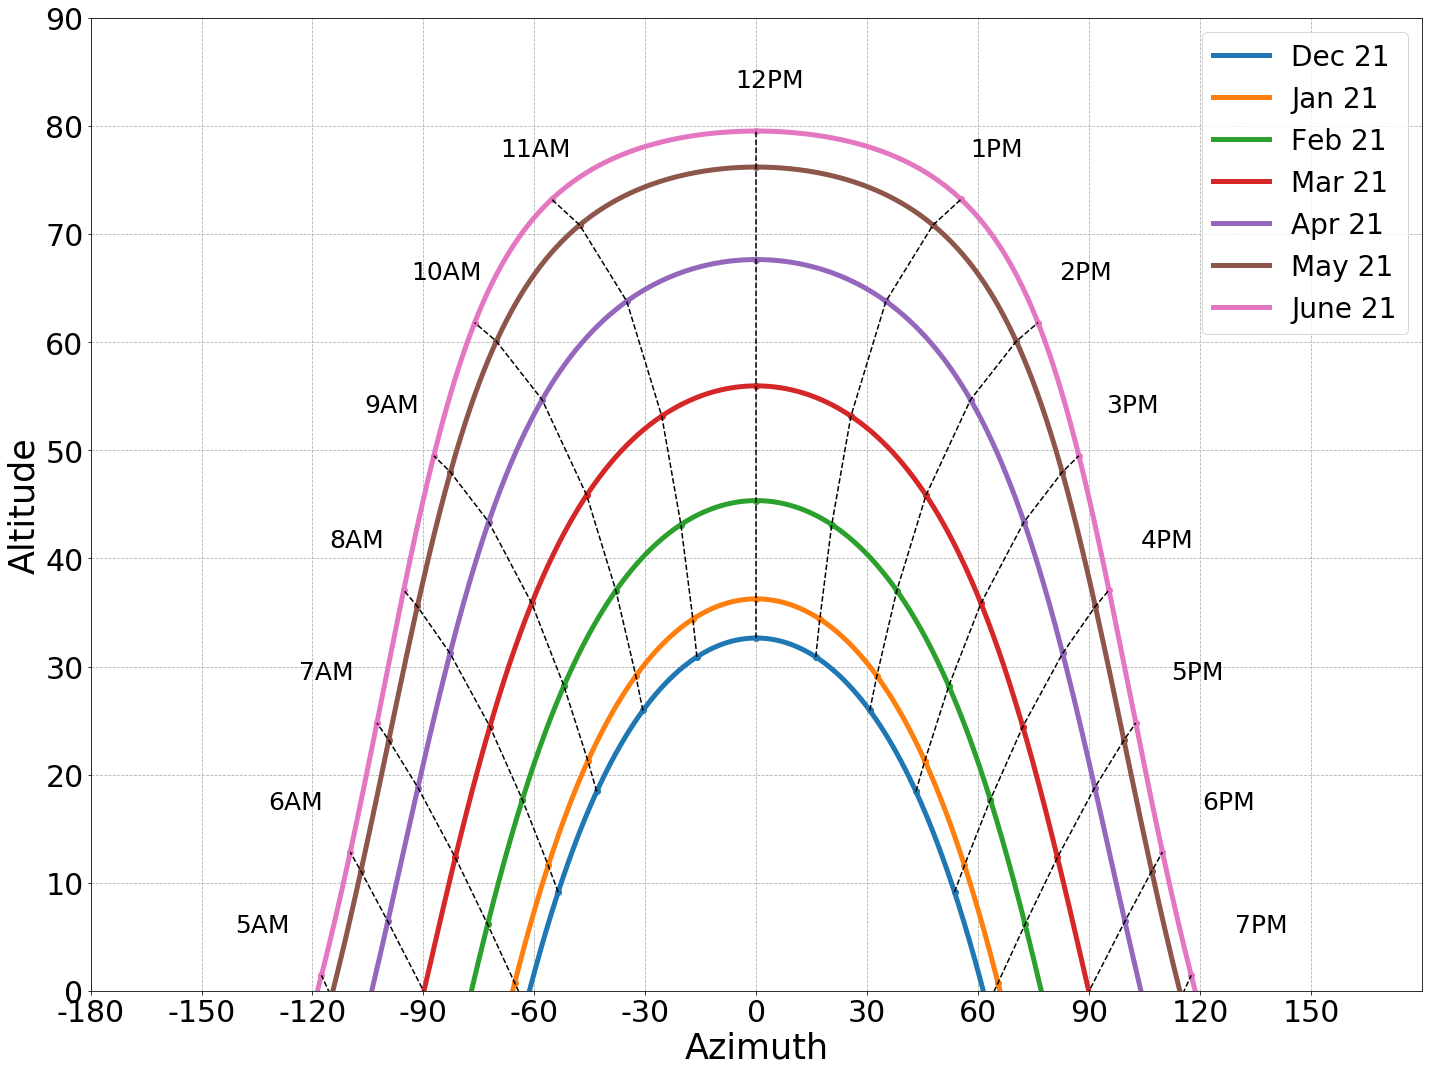

In [6]:
# Scripts below are used for generating 2D sun path plot sun altitude vs azimuth angle
f, ax = plt.subplots(figsize = (20,15))
select_dates = [(12,21), (1,21) ,(2,21),(3,21),(4,21), (5,21),(6,21)]
days = [datetime(2018,item[0],item[1]).timetuple().tm_yday for item in select_dates]
ax.set_ylim([0,math.pi/2])
ax.set_xlim([-math.pi,math.pi])
ax.set_xticks(np.arange(-math.pi, math.pi,math.pi/6))
ax.set_xlabel('Azimuth',fontsize = 35)
labels = [round(math.degrees(item)) for item in ax.get_xticks()]
ax.set_xticklabels(labels, fontsize = 30)


ax.set_yticks(np.linspace(0, math.pi/2,10))
ax.set_ylabel('Altitude',fontsize = 35)
labels = [round(math.degrees(item)) for item in ax.get_yticks()]
ax.set_yticklabels(labels, fontsize = 30)


new = []
for item in days:
    index = np.array(altitude_angles[item]) > 0
    ax.plot(np.array(azimuth_angles[item])[index], np.array(altitude_angles[item])[index], linewidth = 5)
    
    temp1 = np.arange(0,24,0.01)
    hour_change  = [False] + [not int(temp1[i+1]) == int(temp1[i])  for i, item in enumerate(temp1[1:])]
    index1 = np.array(hour_change) & index
    
    new.append([np.array(azimuth_angles[item])[hour_change],np.array(altitude_angles[item])[hour_change]])
    ax.scatter(np.array(azimuth_angles[item])[index1],np.array(altitude_angles[item])[index1])
    
    
for item in np.transpose(np.array(new), (2,1,0)):
    ax.plot(item[0], item[1],'k--')

label = ['','','','','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','','','','','','']
for i,item in enumerate(np.array(new[-1]).T):
    ax.text(item[0]*1.15-0.1, item[1]+0.07, label[i], fontsize = 25)
ax.grid(linestyle = '--')
ax.legend(['Dec 21', 'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'June 21'], fontsize = 28)
f.tight_layout()


# Sol-air temperature

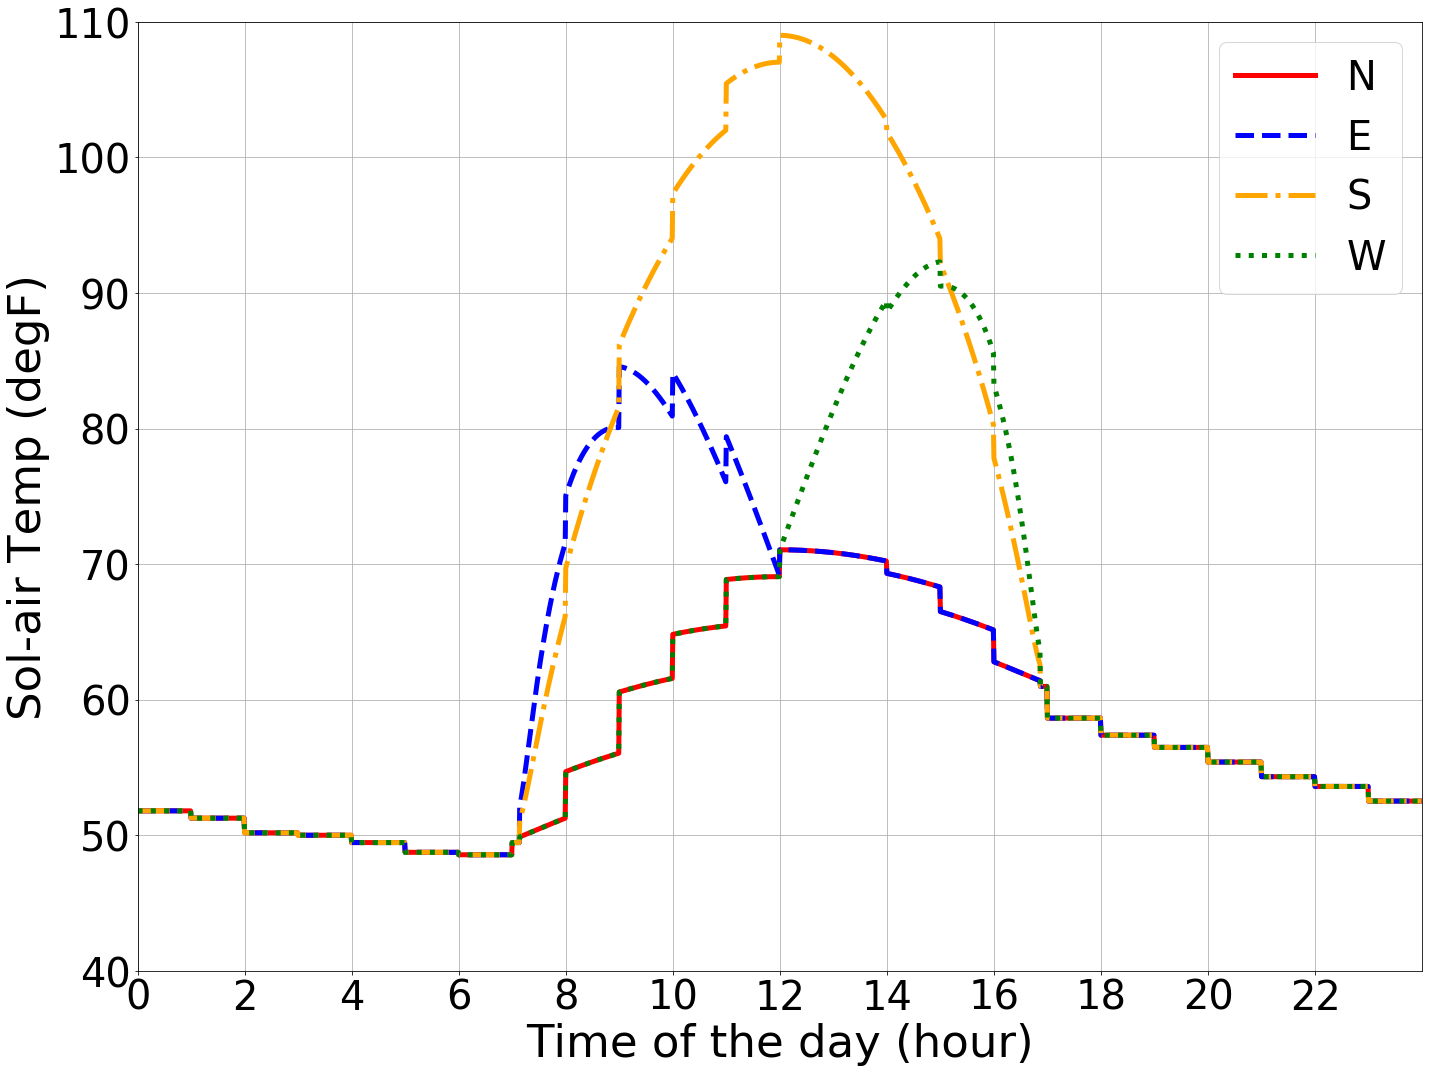

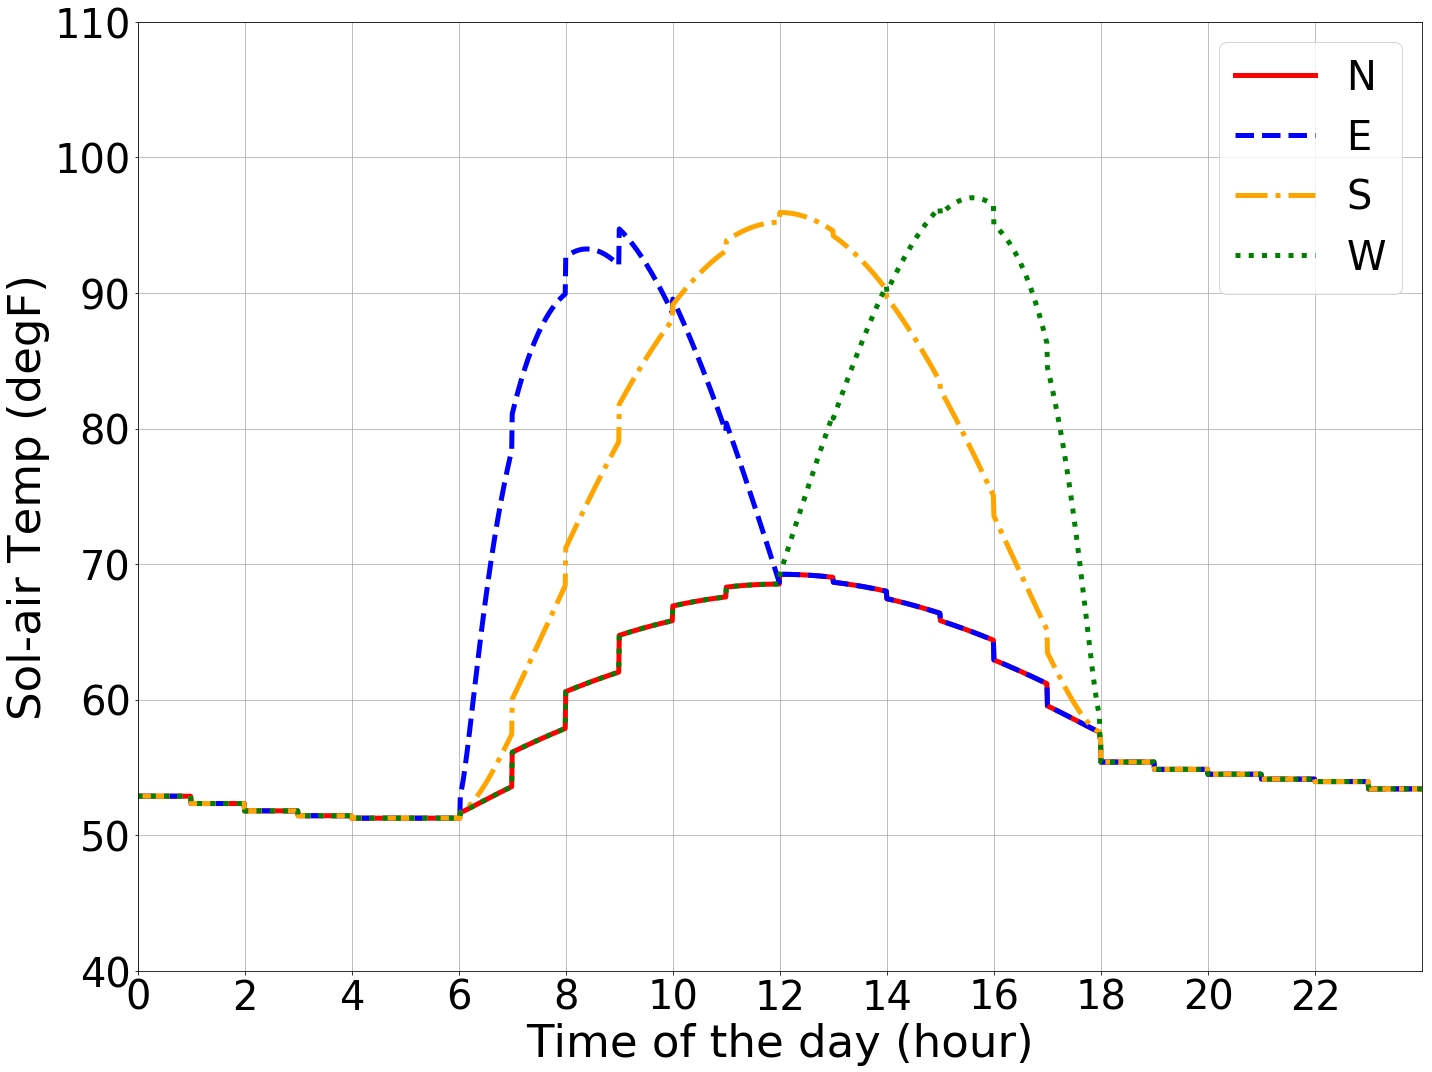

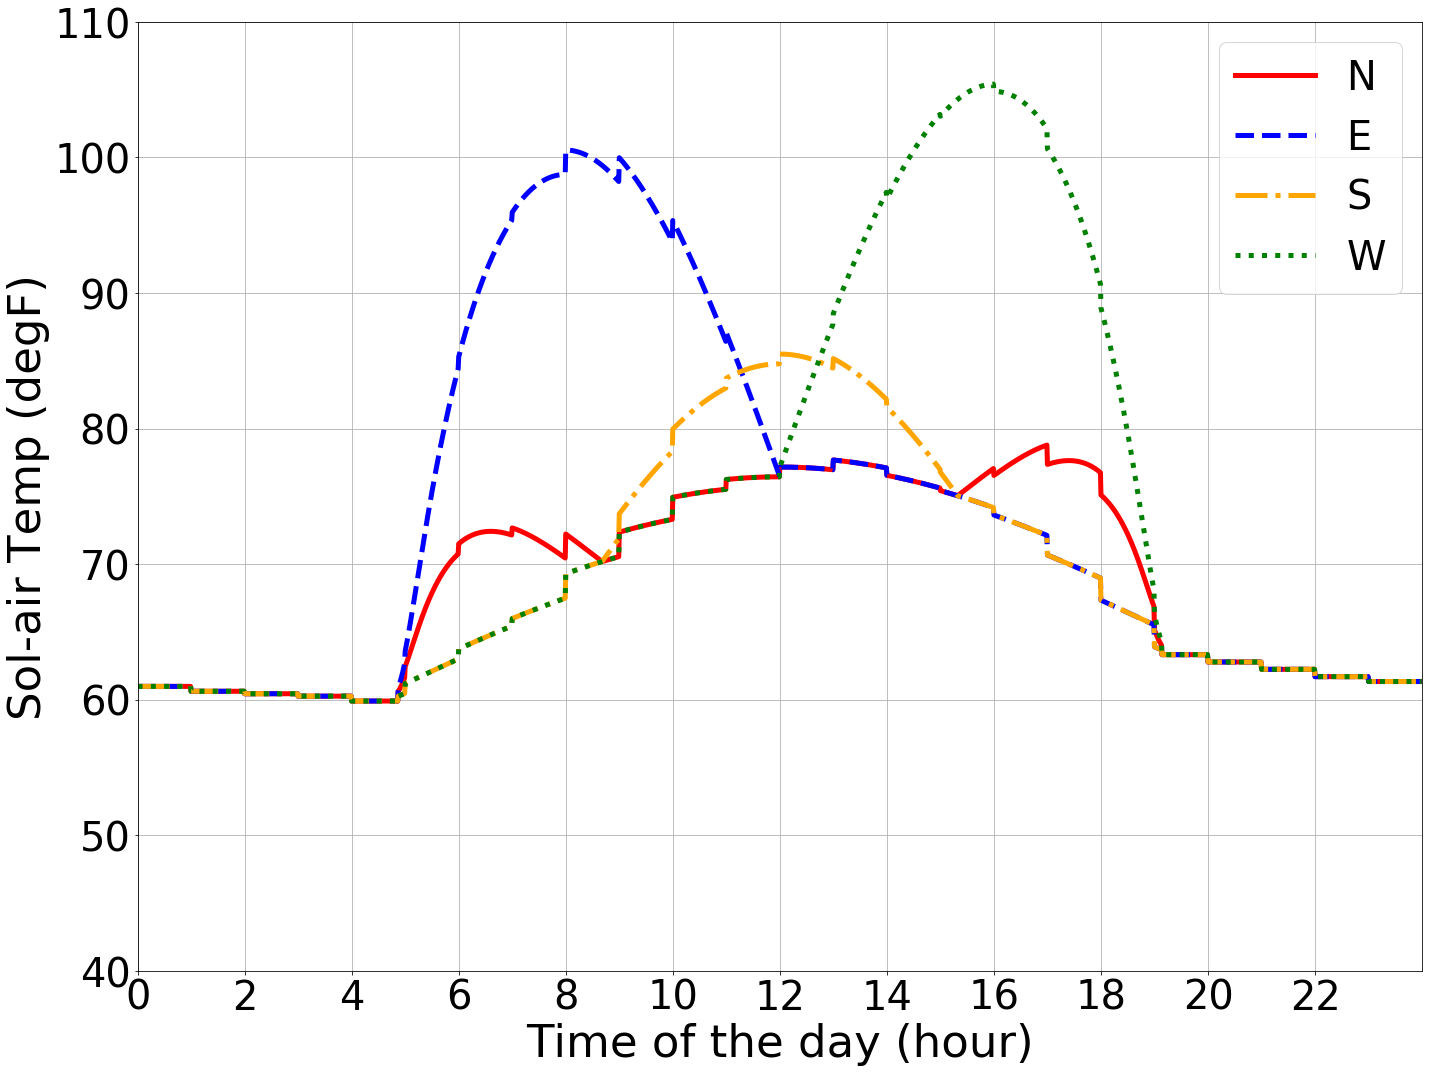

In [7]:
# Clear sky model
alpha = 0.8
h = 28 # Convective heat trasnfer coefficient for the 
surface_azimuth = math.radians(90)

# The values below are adapted from ASHRAE Fundamentals 2009
tau_b = [0.326, 0.341, 0.357, 0.371, 0.398, 0.390, 0.453, 0.440, 0.388, 0.380, 0.335, 0.318] # Transmittance value for beam radiation
tau_d = [2.517, 2.418, 2.366, 2.293, 2.221, 2.288, 2.047, 2.108, 2.332, 2.268, 2.486, 2.541]# Transmittance value for beam radiation
ambient_temp = [[11.9, 11.7, 11.1, 10.6, 10.3, 10.4, 10.2, 10.8, 12.5, 14.4, 15.9, 17.1, 17.2, 16.8, 16.5, 15.8, 14.8, 14.0, 13.7, 13.6, 13.3, 13.1, 12.9, 12.2],\
                [11.7, 11.3, 10.9, 10.6, 10.4, 10.2, 10.1, 11.8, 13.5, 15.2, 15.6, 16.1, 16.6, 16.2, 15.8, 15.4, 14.5, 13.7, 12.9, 12.7, 12.6, 12.5, 12.2, 12.0],\
                [11.6, 11.3, 11.0, 10.8, 10.7, 10.7, 10.7, 12.1, 13.6, 15.1, 15.7, 16.1, 16.5, 16.3, 16.0, 15.7, 14.9, 14.0, 13.0, 12.7, 12.5, 12.3, 12.2, 11.9],\
                [13.1, 13.2, 13.1, 12.8, 12.7, 12.5, 12.3, 13.8, 15.5, 17.0, 18.0, 18.4, 18.4, 18.4, 17.9, 17.8, 17.4, 16.4, 15.4, 14.6, 14.2, 13.7, 13.5, 13.4], \
                [15.1, 15.0, 14.8, 14.7, 14.5, 14.9, 15.3, 15.7, 16.9, 18.1, 19.2, 19.6, 20.0, 20.5, 20.0, 19.6, 19.2, 18.3, 17.4, 16.4, 16.1, 15.8, 15.5, 15.3],\
                [16.1, 15.9, 15.8, 15.7, 15.5, 15.9, 16.3, 16.6, 17.6, 18.6, 19.5, 19.9, 20.3, 20.7, 20.4, 20.3, 20.0, 19.2, 18.3, 17.4, 17.1, 16.8, 16.5, 16.3],\
                [18.1, 18.0, 17.9, 17.9, 17.8, 18.0, 18.4, 18.9, 20.4, 21.5, 21.9, 22.0, 22.3, 22.2, 22.3, 22.0, 21.5, 20.8, 19.9, 19.1, 18.7, 18.4, 18.5, 18.4],\
                [18.3, 18.1, 18.1, 17.8, 17.7, 17.8, 18.5, 20.1, 21.8, 23.2, 23.9, 24.4, 24.6, 24.4, 23.9, 23.3, 22.5, 21.1, 20.1, 19.6, 19.4, 19.2, 18.9, 18.7],\
                [18.1, 17.6, 17.3, 17.0, 16.9, 16.9, 16.8, 17.5, 19.0, 20.9, 22.3, 23.2, 23.4, 23.6, 23.3, 22.8, 22.0, 20.7, 19.6, 19.2, 19.0, 18.8, 18.5, 18.3],\
                [15.9, 15.6, 15.4, 15.3, 14.8, 14.7, 14.8, 15.5, 17.2, 18.8, 20.1, 21.0, 21.4, 21.3, 20.9, 20.2, 18.9, 17.7, 17.2, 17.1, 16.8, 16.6, 16.2, 16.0],\
                [13.6, 13.1, 12.7, 12.4, 12.1, 11.9, 11.7, 11.5, 13.5, 15.5, 17.5, 18.1, 18.8, 19.5, 19.0, 18.5, 18.0, 17.2, 16.5, 15.7, 15.3, 15.0, 14.6, 14.1], \
                [11.0, 10.7, 10.1, 10.0, 9.7, 9.3, 9.2, 9.7, 11.6, 14.1, 15.9, 17.8, 18.9, 18.9, 18.4, 17.4, 16.1, 14.8, 14.1, 13.6, 13.0, 12.4, 12.0, 11.4]]

select_dates = [(12,21) ,(3,21),(6,21)]
beam =[]
dif = []
I_glo_day = []
sol_air = []
final =[]

for surface_azimuth in [math.radians(-180),math.radians(-90) ,math.radians(0),math.radians(90)]:
    beam =[]
    dif = []
    I_glo_day = []
    sol_air = []
    for day in select_dates:

        n = datetime(2018,day[0],day[1]).timetuple().tm_yday
        month = day[0]
        tau_b_i = tau_b[month-1]
        tau_d_i = tau_d[month-1]
        ab = 1.219-0.043*tau_b_i-0.151*tau_d_i - 0.204*tau_b_i*tau_d_i
        ad = 0.202 + 0.852*tau_b_i-0.007*tau_d_i  - 0.357*tau_b_i*tau_d_i
        beam_i = []
        dif_i = []
        I_glo_i = []
        I0_norm = (1+0.033*math.cos(math.radians(360*(n-3)/(365))))*1367 #  extraterrestrial radiant flux 
        sol_air_i =[]
        for i, hour in enumerate(np.arange(0,24,0.01)):
            if zenith_angles[n-1][i] < math.radians(90): # Do calcautions only if the soalr altitude is above zero degree (i.e. hours between s.r and s.s.)
                azimuth_i = azimuth_angles[n-1][i] # azimuth angle from from previous calculations
                zenith_i = zenith_angles[n-1][i]  # zenith angle from from previous calculations
                altitude_angle_i =  altitude_angles[n-1][i]
                air_mass = 1/ (math.sin(altitude_angle_i)+0.50572*(6.07995+math.degrees(altitude_angle_i))**(-1.6364))  # Air mass model from ASHRAE fundamentals
                beam_now = I0_norm*math.exp(-tau_b_i*air_mass**ab) # Empiriacl model from ASHRAE fundamentals
                dif_now = I0_norm*math.exp(-tau_d_i*air_mass**ad)
                beam_i.append(beam_now)
                dif_i.append(dif_now)
                cos_theta_i = math.sin(zenith_i) * math.cos(azimuth_i - surface_azimuth)

                direct = beam_now*cos_theta_i
                if direct < 0:  # Due to math, the radiation intensity can be below zero, thus this value shall be limited to zero
                    direct = 0

                diffuse = dif_now/2
                if diffuse < 0: # Due to math, the radiation intensity can be below zero, thus this value shall be limited to zero
                    diffuse = 0

                ref = 0.2 /2 *(beam_now*math.cos(zenith_i) + dif_now)
                if ref < 0: # Due to math, the radiation intensity can be below zero, thus this value shall be limited to zero
                    ref = 0

                I_glo = direct + diffuse+ ref
                I_glo_i.append(I_glo)
            else:
                I_glo = 0
                beam_i.append(0)
                dif_i.append(0)
                I_glo_i.append(0)
            t0 = ambient_temp[month-1][int(hour)]
            sol_air_i.append(t0 + alpha * I_glo / h)
        I_glo_day.append(I_glo_i)
        beam.append(beam_i)
        dif.append(dif_i)
        sol_air.append(sol_air_i)
    final.append(sol_air)
    


titles  = ['Dec 21', 'Mar 21', 'June 21']
for i, item in enumerate(np.transpose(final, (1,0,2))):
    f,ax = plt.subplots(figsize = (20,15))
    ax.plot(np.arange(0,24,0.01),item[0],'r', linewidth =5)
    ax.plot(np.arange(0,24,0.01),item[1], 'b--', linewidth =5)
    ax.plot(np.arange(0,24,0.01),item[2], 'orange',linestyle = "-.", linewidth =5)
    ax.plot(np.arange(0,24,0.01),item[3], 'green', linestyle = ':' , linewidth =5)
    
    F = np.arange(40,120,10)
    C = (5/9) * (F - 32)
    ax.set_yticks(C)
    ax.set_ylim([C[0],C[-1]])

    
    
    ax.set_xlim([0,24])
    ax.set_xticks(np.arange(0,24,2))

    ax.set_ylabel('Sol-air Temp (degF)',fontsize = 45)
    ax.set_xlabel('Time of the day (hour)',fontsize = 45)

    ax.set_yticklabels(F, fontsize = 40)
    labels = [item for item in ax.get_xticks()]
    ax.set_xticklabels(labels,fontsize = 40)

    ax.grid()

    ax.legend(['N','E','S','W'],fontsize = 40)
    f.tight_layout()
    
    f.show()


# Sol-air: Identify the month with peak cooling load

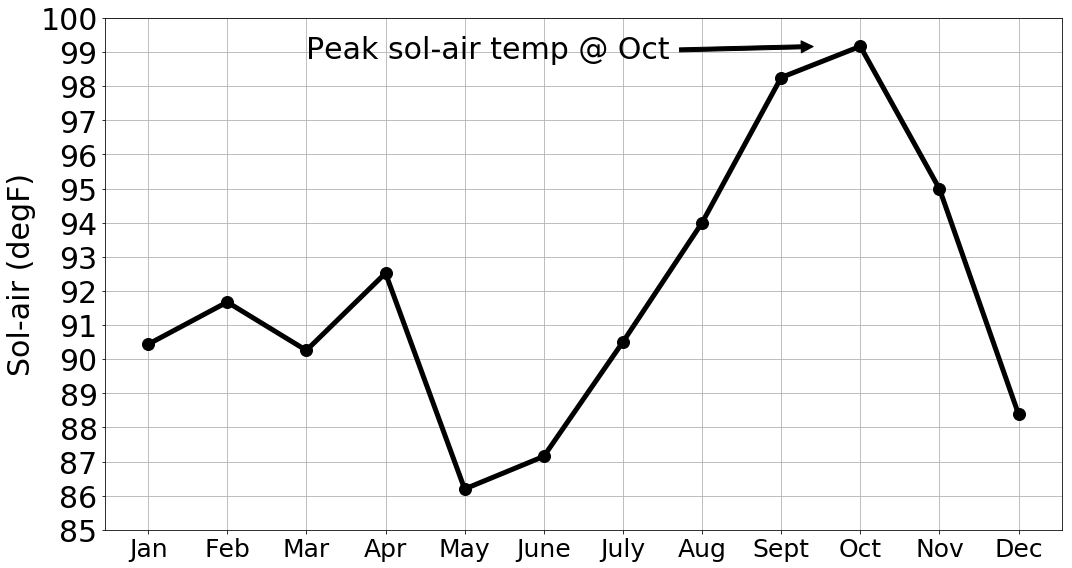

In [8]:
ambient_temp = [26.6, 27.1, 26.5, 28.5, 25.6, 26.4, 28.1, 29.5, 31.2, 31.5, 29.2, 25.6]

E = [175, 205, 227 ,227, 220 ,214 ,215 ,219 ,215, 195 ,173 ,162]  #SHGF values for each month
S = [246 ,221, 176, 115, 74 ,60, 72  ,111,   171, 215 ,243, 252] #SHGF values for each month
h =28
alpha = 0.8

sol_air = []
for i in range(12):
    I = E[i]* (18+69.5)/(18+69.5+64.95)+ S[i]*64.95/(18+69.5+64.95)

    sol_air.append(ambient_temp[i] + alpha * I / h)
    

f,ax = plt.subplots(figsize = (15,8))
ax.plot(sol_air,linewidth=5, color = 'k', marker='o',markersize=12)
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','June', 'July', 'Aug', 'Sept', 'Oct', 'Nov','Dec'], fontsize = 25)

F = np.arange(85,101,1)
C = (5/9) * (F - 32)
ax.set_yticks(C)
ax.set_ylim([C[0],C[-1]])
ax.set_yticklabels(F, fontsize = 30)
ax.grid()
xmax = 9
ymax = max(sol_air)
ax.annotate('Peak sol-air temp @ Oct', xy=(xmax-0.5, ymax), xytext=(xmax-7, ymax-0.2),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30
            )
ax.set_ylabel('Sol-air (degF)',fontsize = 30)
f.tight_layout()
f.show()
